In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\bryan\Desktop\Computer Stuff\New_Data_Science_Class\08-Linear-Regression-Models\Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [42]:
#Feature engineering for total spent

df['total_spent'] = df['TV'] + df['radio'] + df['newspaper']

In [43]:
df.head()

,TV,radio,newspaper,sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [44]:
df.corr()

,TV,radio,newspaper,sales,total_spent
TV,1.000000,0.054809,0.056648,0.782224,0.945330
radio,0.054809,1.000000,0.354104,0.576223,0.293211
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
sales,0.782224,0.576223,0.228299,1.000000,0.867712
total_spent,0.945330,0.293211,0.343059,0.867712,1.000000


<AxesSubplot:xlabel='total_spent', ylabel='sales'>

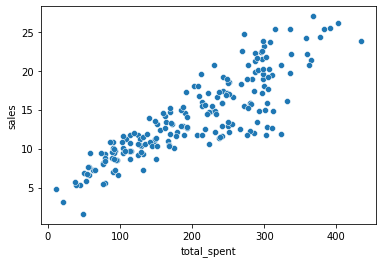

In [45]:
sns.scatterplot(data=df, x='total_spent',y='sales')

<AxesSubplot:xlabel='total_spent', ylabel='sales'>

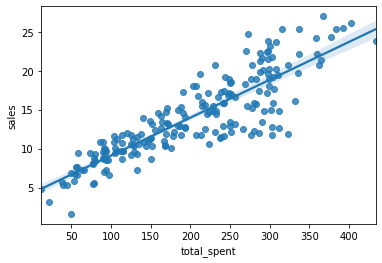

In [46]:
sns.regplot(data=df, x='total_spent',y='sales')

In [52]:
X1 = df['total_spent']
y1 = df['sales']

np.polyfit(X1,y1,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

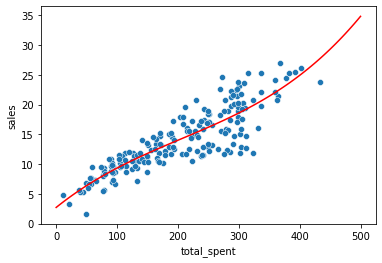

In [53]:
pot_spend = np.linspace(0,500,100)

pred_sales = 3.07615033e-07*pot_spend**3 +  -1.89392449e-04*pot_spend**2 +  8.20886302e-02*pot_spend +  2.70495053e+00

sns.scatterplot(x='total_spent',y='sales', data=df)
plt.plot(pot_spend, pred_sales, color='red')

In [5]:
X = df.drop('sales',axis=1)

In [6]:
y = df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
poly_features = polynomial_converter.transform(X)

In [11]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [12]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [13]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state = 101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
test_predictions = model.predict(X_test)

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.4896798044803811

In [23]:
MSE = mean_absolute_error(y_test, test_predictions)
MSE

0.4896798044803811

In [24]:
RMSE = np.sqrt(MSE)
RMSE

0.6997712515389448

In [25]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state = 101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [26]:
train_rmse_errors

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020673,
 0.3517083688399342,
 0.2509342947031756,
 0.19704459846550335,
 5.421420485986226,
 0.14180598547601236,
 0.16654227322955148]

In [27]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269268,
 0.5803286825165035,
 0.5077742649213955,
 2.575831166466207,
 4.492699702511413,
 1381.4044216899786,
 4449.599748615501,
 95891.24543526075]

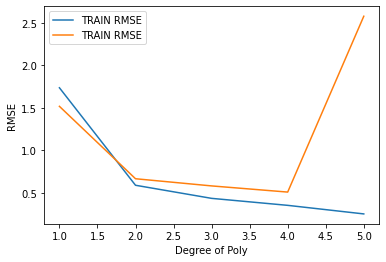

In [28]:
plt.plot(range(1,6), train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5],label='TRAIN RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

In [29]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [30]:
final_model = LinearRegression()

In [31]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y )

LinearRegression()

In [32]:
from joblib import dump, load

In [33]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [34]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [35]:
loaded_converter = load('final_converter.joblib')

In [36]:
loaded_model = load('final_poly_model.joblib')

In [37]:
campaign = [[149,22,12]]

In [38]:
transformed_data = loaded_converter.fit_transform(campaign)

In [39]:
loaded_model.predict(transformed_data)

array([14.64501014])